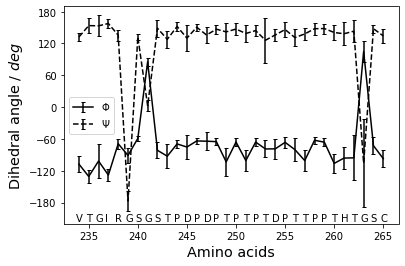

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#pdb_data = np.genfromtxt('phi_psi_from_pdb.dat', usecols=(0,1,2))
talos_data = np.genfromtxt('pred_gc.tab', usecols=(0,1, 2,3,4,5))
##missing_aa = np.where(talos_data==9999.000)
##nline = ''
##for item in np.unique(missing_aa[0]+1):
##    nline = nline + '+' + str(item)
##print(nline)
##nline = ''
##
##for item in np.unique(missing_aa[0]+1):
##    nline = nline + '+' + str(item)
##print(nline)
talos_data = np.where(talos_data==9999.000, np.nan, talos_data)

font0 = FontProperties()

fontx = font0.copy()
fontx.set_style('normal')
fontx.set_family('sans-serif')
fontx.set_size('x-large')

fonty = font0.copy()
fonty.set_style('italic')
fonty.set_family('sans-serif')
fonty.set_size('x-large')

font_ticks = font0.copy()
font_ticks.set_family('sans-serif')
font_ticks.set_size('medium')

def plot_data(angle):
    if angle=='phi':
        a = 2
        fmt = 'k-'
        label = r'$\Phi$'
    elif angle=='psi':
        a = 3
        fmt = 'k--'
        label = r'$\Psi$'

    plt.errorbar(talos_data[:,0]+34, talos_data[:,a], yerr=talos_data[:,a+2], fmt=fmt, capsize=2, label=label)
    plt.xlabel('Amino acids', fontproperties=fontx)
    #plt.xticks(np.arange(1, 330, step=32), fontproperties=font_ticks)
    plt.ylabel('Dihedral angle / $deg$', fontproperties=fontx)
    plt.yticks(np.linspace(-180, 180, num=7), fontproperties=font_ticks)
    plt.legend()



plot_data('phi')
plot_data('psi')

residues = np.loadtxt('pred_gc.tab', usecols=1, dtype=str)
for i,j in zip(talos_data[:,0]+34, residues):
    plt.text(i-0.3, -215, j, ma='left')
plt.ylim(-220, 190 )
plt.savefig('talos_results_2.png', dpi=300)
plt.show()
